# SMAI Assignment - 3

## Question - `1` : Support Vector Machines

This section is divided into 2 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the second subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [1]:
!pip3.9 install numpy
!pip3.9 install matplotlib
!pip3.9 install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Subsection 1

In [2]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

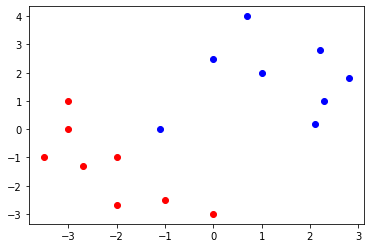

In [3]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to find the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles (check the svm slides uploaded in the portal). Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

In [4]:
# Write your code here
class HardSVM:
    def __init__(self):
        self.b = None
        self.w = None
        
    def fit(self, Xdata, ydata):
        n = Xdata.shape[0]
        d = Xdata.shape[1]
        ydata = np.expand_dims(ydata, axis=1)
        self.b = cp.Variable()
        self.w = cp.Variable((d, 1))
        cons = []
        r = (1/2) * cp.sum_squares(self.w) 
        object = cp.Minimize(r) 
        for index in range(0,n):
            t= Xdata[index] @ self.w + self.b
            temp=ydata[index] * t
            temp=temp >= 1
            cons.append(temp) 
        prob = cp.Problem(object, cons)
        prob.solve() 
        self.w = self.w.value
        self.b = self.b.value
        
    def predict(self, X):
        scores = X @ self.w + self.b
        temp= np.sign(scores)
        temp=temp.flatten()
        return temp

In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines.

Create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [5]:
# Write your code here

def plotScatter(xa, xb, y, s=55):
    maskNeg = y == -1
    maskPos = y == 1
    plt.scatter(xa[maskNeg], xb[maskNeg], marker='o', s=s)
    plt.scatter(xa[maskPos], xb[maskPos], marker='s', s=s)

    

def plotMargins(classifier, axes, withMargins=True):
    w1 = classifier.w.ravel()[0]
    w2 = classifier.w.ravel()[1]
    bias = classifier.b
    getx2 = lambda x1, margin: (margin - bias - w1 * x1) / w2
    temp=axes[0:2]
    plotx0 = np.array(temp)
    margins = [0]
    if withMargins==True:
        margins = [0, -1, 1]
    for m in margins:
        alpha = 1
        if m!=0:
            alpha = 0.7
        plotx1 = getx2(plotx0, m)
        if m != 0:
            plt.plot(plotx0, plotx1, 'k--', alpha=alpha, zorder=-10)
        else:
            plt.plot(plotx0, plotx1, 'k-', alpha=alpha, zorder=-10)

    plt.axis(axes)

def plotDecisionBoundary(classifier, axes):
    x1 = np.linspace(axes[0], axes[1], 100)
    x2 = np.linspace(axes[2], axes[3], 100)
    x1Mesh = np.meshgrid(x1, x2)[0]
    x2Mesh = np.meshgrid(x1, x2)[1]
    x1x2 = np.stack((x1Mesh.ravel(), x2Mesh.ravel()), axis=1)
    gridPrediction = classifier.predict(x1x2)
    gridPrediction = gridPrediction.reshape(x1Mesh.shape)
    plt.imshow(gridPrediction, origin='lower', extent=(axes[0], axes[1], axes[2], axes[3]), cmap='coolwarm', alpha=0.2, aspect='auto')

def plot(Xdata, ydata, classifier):
    plt.scatter(Xdata[:, 0], Xdata[:, 1], c=ydata, cmap='coolwarm')
    plt.xlim([np.min(Xdata[:, 0]) - 0.2, np.max(Xdata[:, 0]) + 0.2])
    plt.ylim([np.min(Xdata[:, 1]) - 0.2, np.max(Xdata[:, 1]) + 0.2])
    plotMargins(classifier, plt.axis())
    plotDecisionBoundary(classifier, plt.axis())




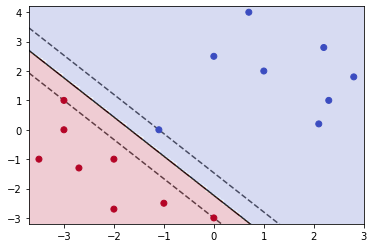

In [6]:
hardSVM = HardSVM()
hardSVM.fit(X, y)
plot(X, y, hardSVM)

In [7]:
print("weights are ",hardSVM.w)


weights are  [[-1.73913043]
 [-1.30434783]]


In [8]:
print("bias term is ",hardSVM.b)

bias term is  -2.91304347826087


In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Plot it. Explain your observations theoretically.

In [9]:
# Re-create the Synthetic Data by adding the points and visualize the points
pX = np.array([[-4, -10], [4, 4]])
X = np.vstack((X, pX))
pY = np.array([1, -1])
y = np.append(y, pY)


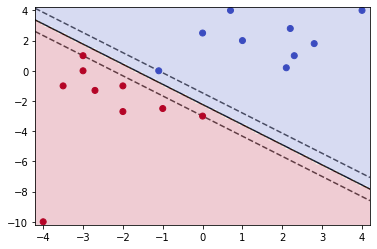

In [10]:
# Solve for the decision boundary using this modified dataset
hardSVM = HardSVM()
hardSVM.fit(X, y)
plot(X, y, hardSVM)

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

In [11]:
from cvxpy.expressions.cvxtypes import constant

class SoftSVM:
    def __init__(self, C=1.0):
        
        self.w,self.b = None,None
        self.C = C

    def fit(self, Xdata, ydata):
        m,n = Xdata.shape[0],Xdata.shape[1]
        self.w, self.b  = cp.Variable(n),cp.Variable()
        self.xi =  cp.Variable(m)
        t1 = 0.5 * cp.sum_squares(self.w)
        t2 = self.C * cp.sum(self.xi)
        object = cp.Minimize(t1 + t2)
        cons = []
        for i in range(0,m):
            temp = Xdata[i] @ self.w + self.b
            temp = cp.multiply(ydata[i], temp)
            c = self.xi[i]
            cons.append(1 - c<=temp)
            cons.append(0<=c)
        prob = cp.Problem(object, cons)
        prob.solve()
        self.w,self.b = self.w.value,self.b.value
        temp = X @ self.w + self.b
        self.support_vector_mask = np.abs(temp) - 1.0 < 1e-5
        
    def predict(self, X):
        t1 = X @ self.w
        t2= self.b
        temp = np.sign(t1 + t2)
        return temp
    

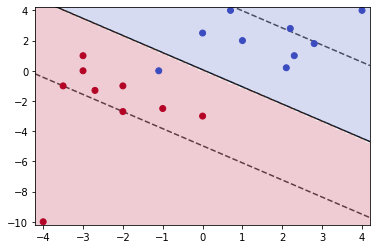

In [12]:
# Write your code here for C= 0.01
softSVM = SoftSVM(0.01)
softSVM.fit(X, y)
plot(X, y, softSVM)
 

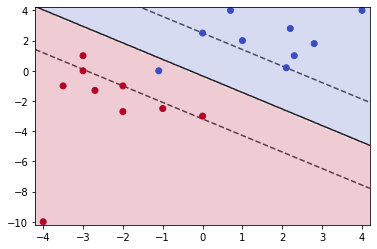

In [13]:
# Write your code here for C= 0.1
softSVM = SoftSVM(0.1)
softSVM.fit(X, y)
plot(X, y, softSVM)
 

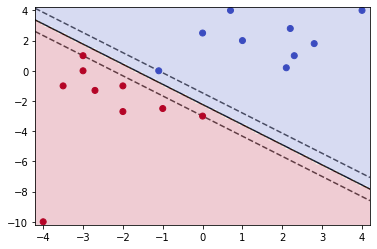

In [14]:
# Write your code here for C= 3
softSVM = SoftSVM(3)
softSVM.fit(X, y)
plot(X, y, softSVM)
 

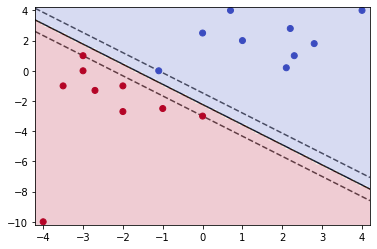

In [15]:
# Write your code here for C= 10
softSVM = SoftSVM(10)
softSVM.fit(X, y)
plot(X, y, softSVM)
 

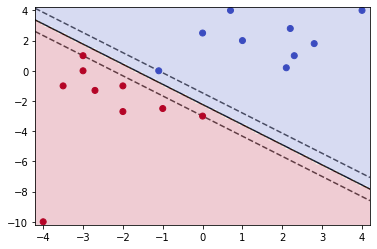

In [16]:
# Write your code here for C= 100
softSVM = SoftSVM(100)
softSVM.fit(X, y)
plot(X, y, softSVM)
 

The SoftSVM algorithm is a modified version of SVM that allows for some misclassification of training examples by controlling the regularization parameter C. 

A small value of C permits more misclassifications, resulting in a less tightly fitted decision boundary that has higher bias but lower variance. 

Conversely, a large value of C penalizes more for misclassifications, leading to a more tightly fitted decision boundary with lower bias but higher variance. 

The plot generated by the code shows that increasing C causes the decision boundary to fit more closely to the training data and narrow the margin lines.However, if C is set too high, overfitting may occur as the decision boundary becomes more sensitive to the location of training examples.





Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why?

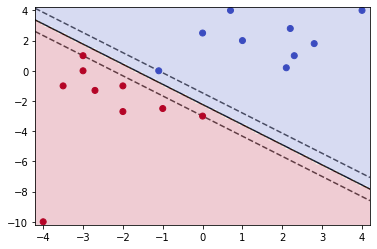

In [17]:
# Write your Code here
classifier = SoftSVM(100)
classifier.fit(X, y)
plot(X, y, classifier)

In [18]:
sv_mask = classifier.support_vector_mask
XMod = X[~np.isin(X, sv_mask).all(axis=1)]
yMod = y[~np.isin(X, sv_mask).all(axis=1)]



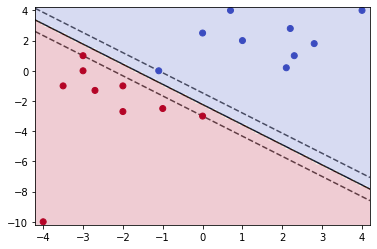

In [19]:
classifier.fit(XMod, yMod)
plot(XMod, yMod, classifier)

If we remove support vectors, the decision boundary can change, and the model may overfit to the remaining data points since it's optimized to fit them more closely. To prevent this, we can consider using a smaller value of C when re-fitting the model without support vectors. This will encourage a larger margin, which improves the model's ability to generalize to new data.

### Subsection 2

In [20]:
!pip3.9 install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-03-28 10:18:01--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.64.80.1, 2606:4700:3034::6815:1d24, 2606:4700:3036::ac43:ab4c
Connecting to yann.lecun.com (yann.lecun.com)|172.64.80.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2023-03-28 10:18:01 (84.3 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-03-28 10:18:02--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.64.80.1, 2606:4700:3034::6815:1d24, 2606:4700:3036::ac43:ab4c
Connecting to yann.lecun.com (yann.lecun.com)|172.64.80.1|:80... connected.
HTTP request sent, awaiting response... 

In [21]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [22]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [23]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels (Linear, Polynomial, RBF, Sigmoid) for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [24]:
# use this subset of data for training and testing

batch = 3000
X_train = images_train[:batch,:]
y_train = labels_train[:batch]

X_test = images_test[batch:2*batch,:]
y_test = labels_test[batch:2*batch]

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 784)
(3000,)
(3000, 784)
(3000,)


In [26]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

CValues = [0.01, 0.1, 3, 10, 100]
table = PrettyTable(["C", "Accuracy"])
for c in CValues:
    table.align = 'l'
    svm = LinearSVC(C=c, max_iter=10000)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    table.add_row([c,accuracy])

In [27]:
print(table)

+------+--------------------+
| C    | Accuracy           |
+------+--------------------+
| 0.01 | 0.8056666666666666 |
| 0.1  | 0.8056666666666666 |
| 3    | 0.807              |
| 10   | 0.807              |
| 100  | 0.8063333333333333 |
+------+--------------------+


# Modify this later
There isn't much change in the values of accuracies

In [28]:

gammaValues = [0.01, 0.1, 3, 10,100]

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for k in kernels:
    table = PrettyTable(["Gamma Value", "Accuracy"])
    for g in gammaValues:
        table.align = 'l'

        if k in ['linear','rbf', 'sigmoid']:
            svm = SVC(kernel=k, gamma=g, C=1, max_iter=10000)
        else:
            svm = SVC(kernel=k, degree=3, gamma=g, C=1, max_iter=10000)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        table.add_row([g,accuracy_score(y_test, y_pred)])
    print("Accuracy with ",k)
    print(table)    


Accuracy with  linear
+-------------+--------------------+
| Gamma Value | Accuracy           |
+-------------+--------------------+
| 0.01        | 0.8893333333333333 |
| 0.1         | 0.8893333333333333 |
| 3           | 0.8893333333333333 |
| 10          | 0.8893333333333333 |
| 100         | 0.8893333333333333 |
+-------------+--------------------+
Accuracy with  poly
+-------------+----------+
| Gamma Value | Accuracy |
+-------------+----------+
| 0.01        | 0.924    |
| 0.1         | 0.924    |
| 3           | 0.924    |
| 10          | 0.924    |
| 100         | 0.924    |
+-------------+----------+
Accuracy with  rbf
+-------------+---------------------+
| Gamma Value | Accuracy            |
+-------------+---------------------+
| 0.01        | 0.11533333333333333 |
| 0.1         | 0.11533333333333333 |
| 3           | 0.11533333333333333 |
| 10          | 0.11533333333333333 |
| 100         | 0.11533333333333333 |
+-------------+---------------------+
Accuracy with  sigmoi

As we can see, the sigmoid and rbf kernel performs poorly for all the values of gamma. The polynomial and linear kernel perform significantly well for all values of gamma.